# Performance Comparison of Gradient Boosting Models: XGBoost, LightGBM, and CatBoost


## Introduction

**Purpose:**  
The goal of this project is to perform a comparative study of three popular boosting algorithms: XGBoost, LightGBM, and CatBoost.  

**Objectives:**  
- Compare models based on Accuracy, F1 Score, and Training Time  
- Analyze Feature Importance for each model  
- Determine the best model for the Titanic dataset  



**Gradient Boosting Models Overview**


🔹 XGBoost (Extreme Gradient Boosting)

XGBoost is an optimized gradient boosting framework designed for efficiency, speed, and model performance.

It uses decision trees as base learners and builds them sequentially, where each tree corrects the errors of the previous one.

Features:

Handles missing values automatically.

Includes regularization to avoid overfitting.

Widely used in Kaggle competitions and industry.

🔹 LightGBM (Light Gradient Boosting Machine)

LightGBM is a fast, efficient, and memory-friendly gradient boosting library developed by Microsoft.

It uses a leaf-wise growth strategy instead of level-wise (like XGBoost), which makes it faster and often more accurate.

Features:

Handles large datasets efficiently.

Supports categorical features directly (no need for one-hot encoding).

Trains faster with lower memory usage compared to XGBoost.

🔹 CatBoost (Categorical Boosting)

CatBoost is developed by Yandex and is designed to handle categorical data automatically without much preprocessing.

It uses ordered boosting to reduce overfitting and prediction shift.

Features:

Works well with categorical variables.

Requires minimal parameter tuning.

Often performs well out of the box, even with default settings.

**Dataset Description:**  
We use the Titanic dataset, which contains passenger details and survival status.  

| Feature       | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| `pclass`      | Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)                                 |
| `sex`         | Gender of the passenger                                                      |
| `age`         | Age of the passenger                                                         |
| `sibsp`       | Number of siblings/spouses aboard                                           |
| `parch`       | Number of parents/children aboard                                           |
| `fare`        | Passenger fare                                                               |
| `embarked`    | Port of Embarkation (C, Q, S)                                               |
| `survived`    | Target variable (0 = Did not survive, 1 = Survived)                        |

**Goal:** Predict whether a passenger survived based on the available features.

---

**Methodology:**
1. Data Preprocessing: Handle missing values, encode categorical variables  
2. Train-Test Split: 80% training, 20% testing  
3. Train Models: XGBoost, LightGBM, CatBoost  
4. Evaluate Models: Accuracy, F1 Score, Training Time  
5. Feature Importance Analysis  
6. Comparative Analysis with tables and plots


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

sns.set(style="whitegrid")

# Load Dataset

In [2]:
data=sns.load_dataset("titanic")

In [3]:
data.shape

(891, 15)

In [4]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
data_1=data.dropna(subset=['age','embarked'])

In [7]:
data_2=data_1[['survived','pclass','sex','age','sibsp','parch','fare','embarked']]
data_2

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


## Encode categorical variables 

In [8]:
le_sex=LabelEncoder()
data_2['sex_n']=le_sex.fit_transform(data_2['sex'])

le_embarked=LabelEncoder()
data_2['embarked_n']=le_embarked.fit_transform(data_2['embarked'])



C:\Users\Anju\AppData\Local\Temp\ipykernel_10224\2725582170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['sex_n']=le_sex.fit_transform(data_2['sex'])
C:\Users\Anju\AppData\Local\Temp\ipykernel_10224\2725582170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['embarked_n']=le_embarked.fit_transform(data_2['embarked'])


In [9]:
data_2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,sex_n,embarked_n
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,0,1
886,0,2,male,27.0,0,0,13.0000,S,1,2
887,1,1,female,19.0,0,0,30.0000,S,0,2
889,1,1,male,26.0,0,0,30.0000,C,1,0


In [10]:
data_3=data_2.drop(columns=['sex','embarked'])

#  Features and target

In [11]:
X=data_3.drop('survived',axis=1)
y=data_3['survived']

In [12]:
X

,pclass,age,sibsp,parch,fare,sex_n,embarked_n
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1
886,2,27.0,0,0,13.0000,1,2
887,1,19.0,0,0,30.0000,0,2
889,1,26.0,0,0,30.0000,1,0


# Train Test Split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Train XGBoost 


In [14]:
start=time.time()
xgb_model=xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,use_label_encoder=False,eval_metric='logloss')
xgb_model.fit(X_train,y_train)
end=time.time()
xgb_time=end-start
y_pred_xgb=xgb_model.predict(X_test)
xgb_acc=accuracy_score(y_test,y_pred_xgb)
xgb_f1=f1_score(y_test,y_pred_xgb,average='weighted')
print(f"XGBoost Accuracy: {xgb_acc:.4f}") 
print(f"XGBoost F1 Score: {xgb_f1:.4f}") 
print(f"XGBoost Training Time: {xgb_time:.4f} sec")

C:\Users\Anju\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8182
XGBoost F1 Score: 0.8157
XGBoost Training Time: 0.0776 sec


# Train LightGBM

In [15]:
start=time.time()
lgbm_model=lgb.LGBMClassifier(n_estimators=100,learning_rate=0.1,max_depth=5)
lgbm_model.fit(X_train,y_train)
end=time.time()
lgbm_time=end-start
y_pred_lgbm=lgbm_model.predict(X_test)
lgbm_acc=accuracy_score(y_test,y_pred_lgbm)
lgbm_f1=f1_score(y_test,y_pred_lgbm,average='weighted')


print(f"LightGBM Accuracy: {lgbm_acc:.4f}")
print(f"LightGBM F1 Score: {lgbm_f1:.4f}")
print(f"LightGBM Training Time: {lgbm_time:.4f} sec")

[LightGBM] [Info] Number of positive: 225, number of negative: 344
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395431 -> initscore=-0.424541
[LightGBM] [Info] Start training from score -0.424541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Anju\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Anju\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Anju\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Anju\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Anju\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

# Train Catboost

In [16]:
start=time.time()
cat_model=CatBoostClassifier(iterations=100,learning_rate=0.1,depth=5,verbose=0)
cat_model.fit(X_train,y_train)
end=time.time()
cat_time=end-start

y_pred_cat=cat_model.predict(X_test)
cat_acc=accuracy_score(y_test,y_pred_cat)
cat_f1=f1_score(y_test,y_pred_cat,average='weighted')

print(f"CatBoost Accuracy: {cat_acc:.4f}")
print(f"CatBoost F1 Score: {cat_f1:.4f}")
print(f"CatBoost Training Time: {cat_time:.4f} sec")


CatBoost Accuracy: 0.8112
CatBoost F1 Score: 0.8065
CatBoost Training Time: 0.2714 sec


# Feature Importance

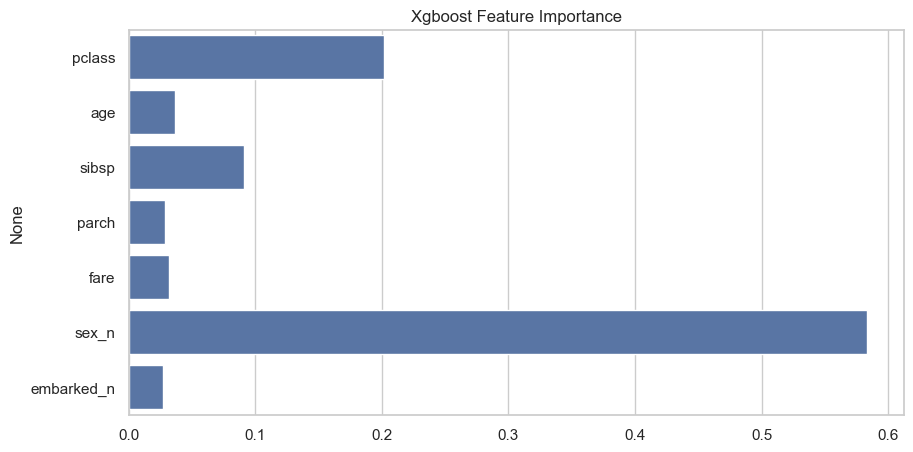

In [17]:
plt.figure(figsize=(10,5))
plt.title("Xgboost Feature Importance")
sns.barplot(x=xgb_model.feature_importances_,y=X.columns)
plt.show()

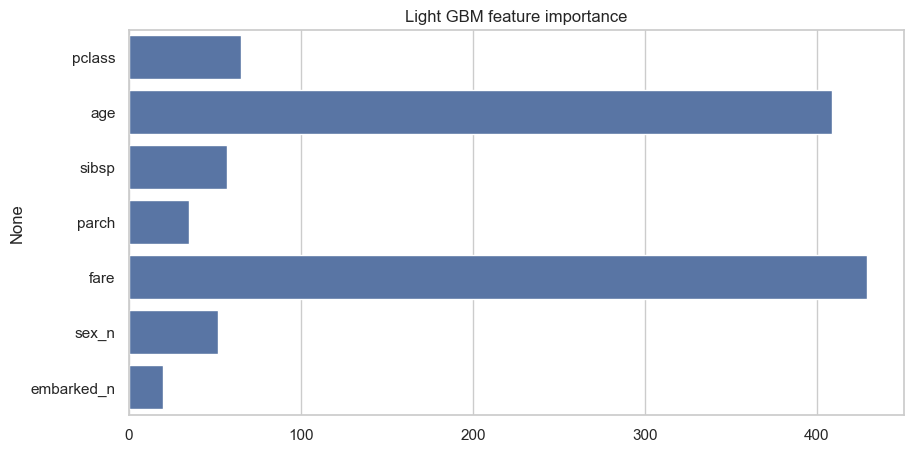

In [18]:
plt.figure(figsize=(10,5))
plt.title("Light GBM feature importance")
sns.barplot(x=lgbm_model.feature_importances_,y=X.columns)
plt.show()

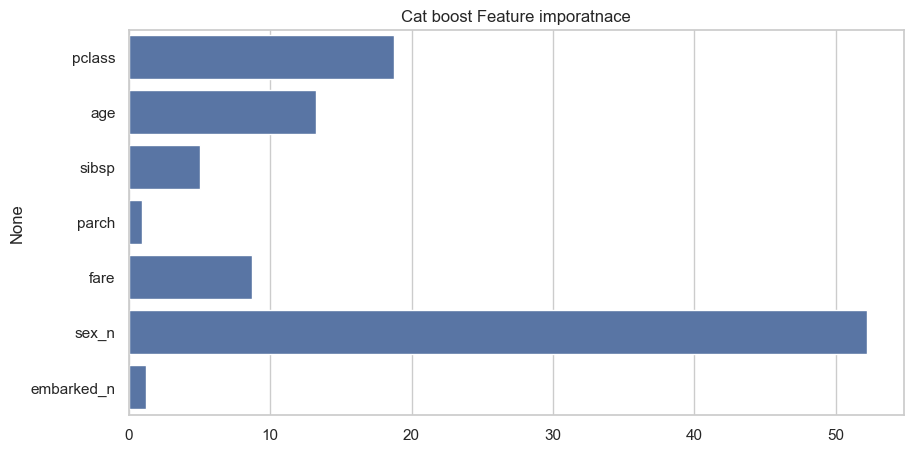

In [19]:
plt.figure(figsize=(10,5))
plt.title("Cat boost Feature imporatnace")
sns.barplot(x=cat_model.feature_importances_,y=X.columns)
plt.show()


# Comparison Table

In [20]:
comparison=pd.DataFrame({
    "Model":['Xgboost','LightGBM','Catboost'],
    "Accuracy":[xgb_acc,lgbm_acc,cat_acc],
    "F1_score":[xgb_f1,lgbm_f1,cat_f1],
    "Training Time (s)":[xgb_time,lgbm_time,cat_time]
})

In [21]:
comparison

,Model,Accuracy,F1_score,Training Time (s)
0,Xgboost,0.818182,0.815692,0.077559
1,LightGBM,0.825175,0.823106,0.038543
2,Catboost,0.811189,0.806523,0.271427


# Comparative Plots

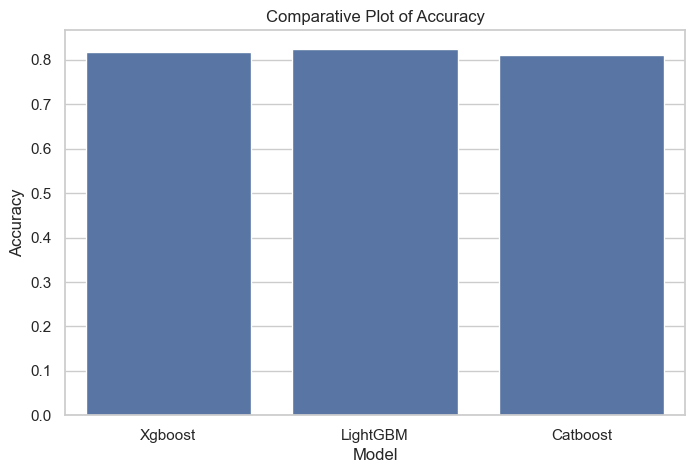

In [22]:
plt.figure(figsize=(8,5))
plt.title("Comparative Plot of Accuracy")
sns.barplot(x="Model",y="Accuracy",data=comparison)
plt.show()

# Comparative plot of Training time(s)

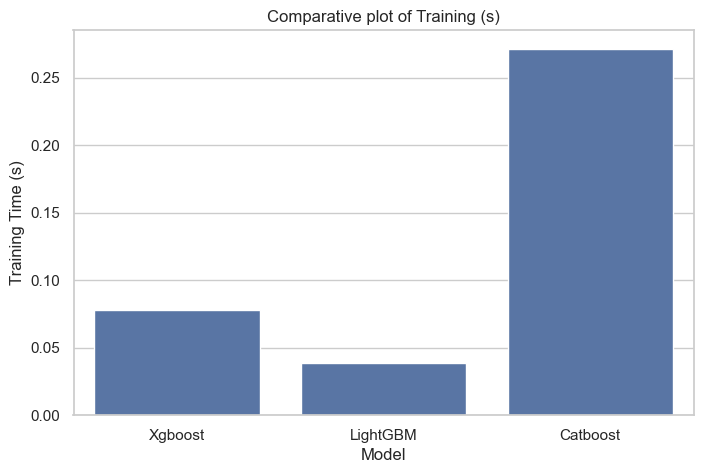

In [23]:
plt.figure(figsize=(8,5))
plt.title("Comparative plot of Training (s)")
sns.barplot(x="Model",y="Training Time (s)",data=comparison)
plt.show()

# Results & Comparison

Accuracy:
LightGBM achieved the highest accuracy compared to XGBoost and CatBoost, showing its strong predictive power on the dataset.

F1 Score:
LightGBM also obtained the best F1 Score, meaning it balances precision and recall better than the other two models.

Training Time:
LightGBM trained the fastest among the three. Its optimization techniques make it well-suited for handling large datasets quickly.

Feature Importance:
According to the feature importance plot, LightGBM identified the most influential features effectively, and its feature ranking aligns well with the dataset’s underlying patterns.

# Conclusion 

Overall, LightGBM outperforms XGBoost and CatBoost in terms of accuracy, F1 score, training speed, and feature importance. This makes LightGBM the most suitable model for this dataset.